# Superposition d'écoulements
Avec ce TP numérique, nous allons implémenter les écoulements vus en classe et construire des écoulements plus complexe grace au prinicipe de superposition.

## Objectifs de la séance
Comprendre le lien pression, vitesse et la generation de la portance sur une forme


### Modules python et paramètres pour les graphiques
En plus des modules de base, nous utiliserons un module personnel pour implémenter les formules vues en classe et supperposer facilement les écoulements.  
**Attention** Si vous modifié le module `banque_ecoulement.py`, vous devez recharger le module après avoir redémarré le noyau `kernel`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import module.banque_ecoulements as bq

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
Ncontours = 40

### Exercice 1 - Comprendre le fonctionnement du module

1. Ouvrez le fichier `banque_ecoulement.py` et essayer de comprendre l'utilisation qui en est faite ci-dessous.
2. Modifiez les paramètres de définitions de la grille ou de l'écoulement
3. Lorsque vous êtes suffisamment initié complétés les écoulements de la banque et testez les

In [3]:
grid = bq.create_2Dgrid_cart()

In [4]:
Vinf = 2.0
L = 5.0
d0 = 0.2

In [5]:
unif = bq.uniform(grid,Vinf)
source = bq.source(grid,L,center=[-d0,0.])
ecoul = bq.superpose_ecoulement(unif,source,grid)

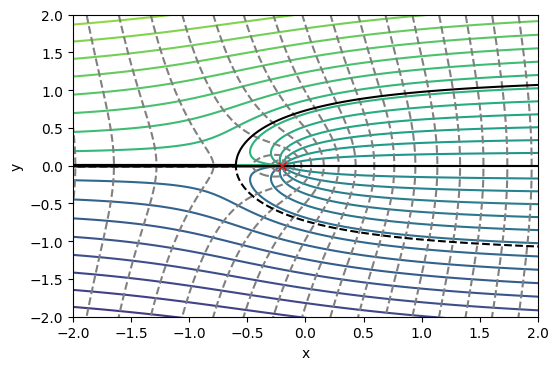

In [6]:
plt.plot([-d0,],[0.,],'x',color='red')
plt.contour(grid['x'],grid['y'],ecoul['psi'],Ncontours)
plt.contour(grid['x'],grid['y'],ecoul['phi'],Ncontours,linestyles='--',colors='grey')
plt.contour(grid['x'],grid['y'],ecoul['psi'],[-L/2,0.,L/2],colors='black')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Exercice 2 - Écoulement autour d'un cylindre
1. Créez un écoulement de vitesse $V_\infty=2.0\text{ m}$ autour d'un cylindre de rayon $R_0=0.5 \text{ m}$. Il n'y a pas de circulation. 
2. Visualisez les lignes de courant et les lignes potentielles à l'aide de `np.contour`.
3. Visualisez le champ de vitesse et le champ de pression à l'aide de `np.contourf`
4. Créez une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle. 

### Exercice 3 - Écoulement autour d'un cylindre et forces aérodynamique
1. Ajoutez une circulation à cet écoulement.
2. Visualisez les lignes de courant et les lignes potentielles.
3. Visualisez le champ de vitesse et le champ de pression.
4. Créer une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle. Calculez les coefficients de portance et trainée sur le cylindre. On utilisera l'intégration numérique de la méthode des trapèzes fournie par la fonction `np.trapz`
6. Faites varier l'intensité de la circulation et reprennez les étapes précédentes.
